In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import eigvals

spectral radius: 15.172367123494888
spectral radius: 17.045015096320434
spectral radius: 11.679427610500689
spectral radius: 19.499095161812804


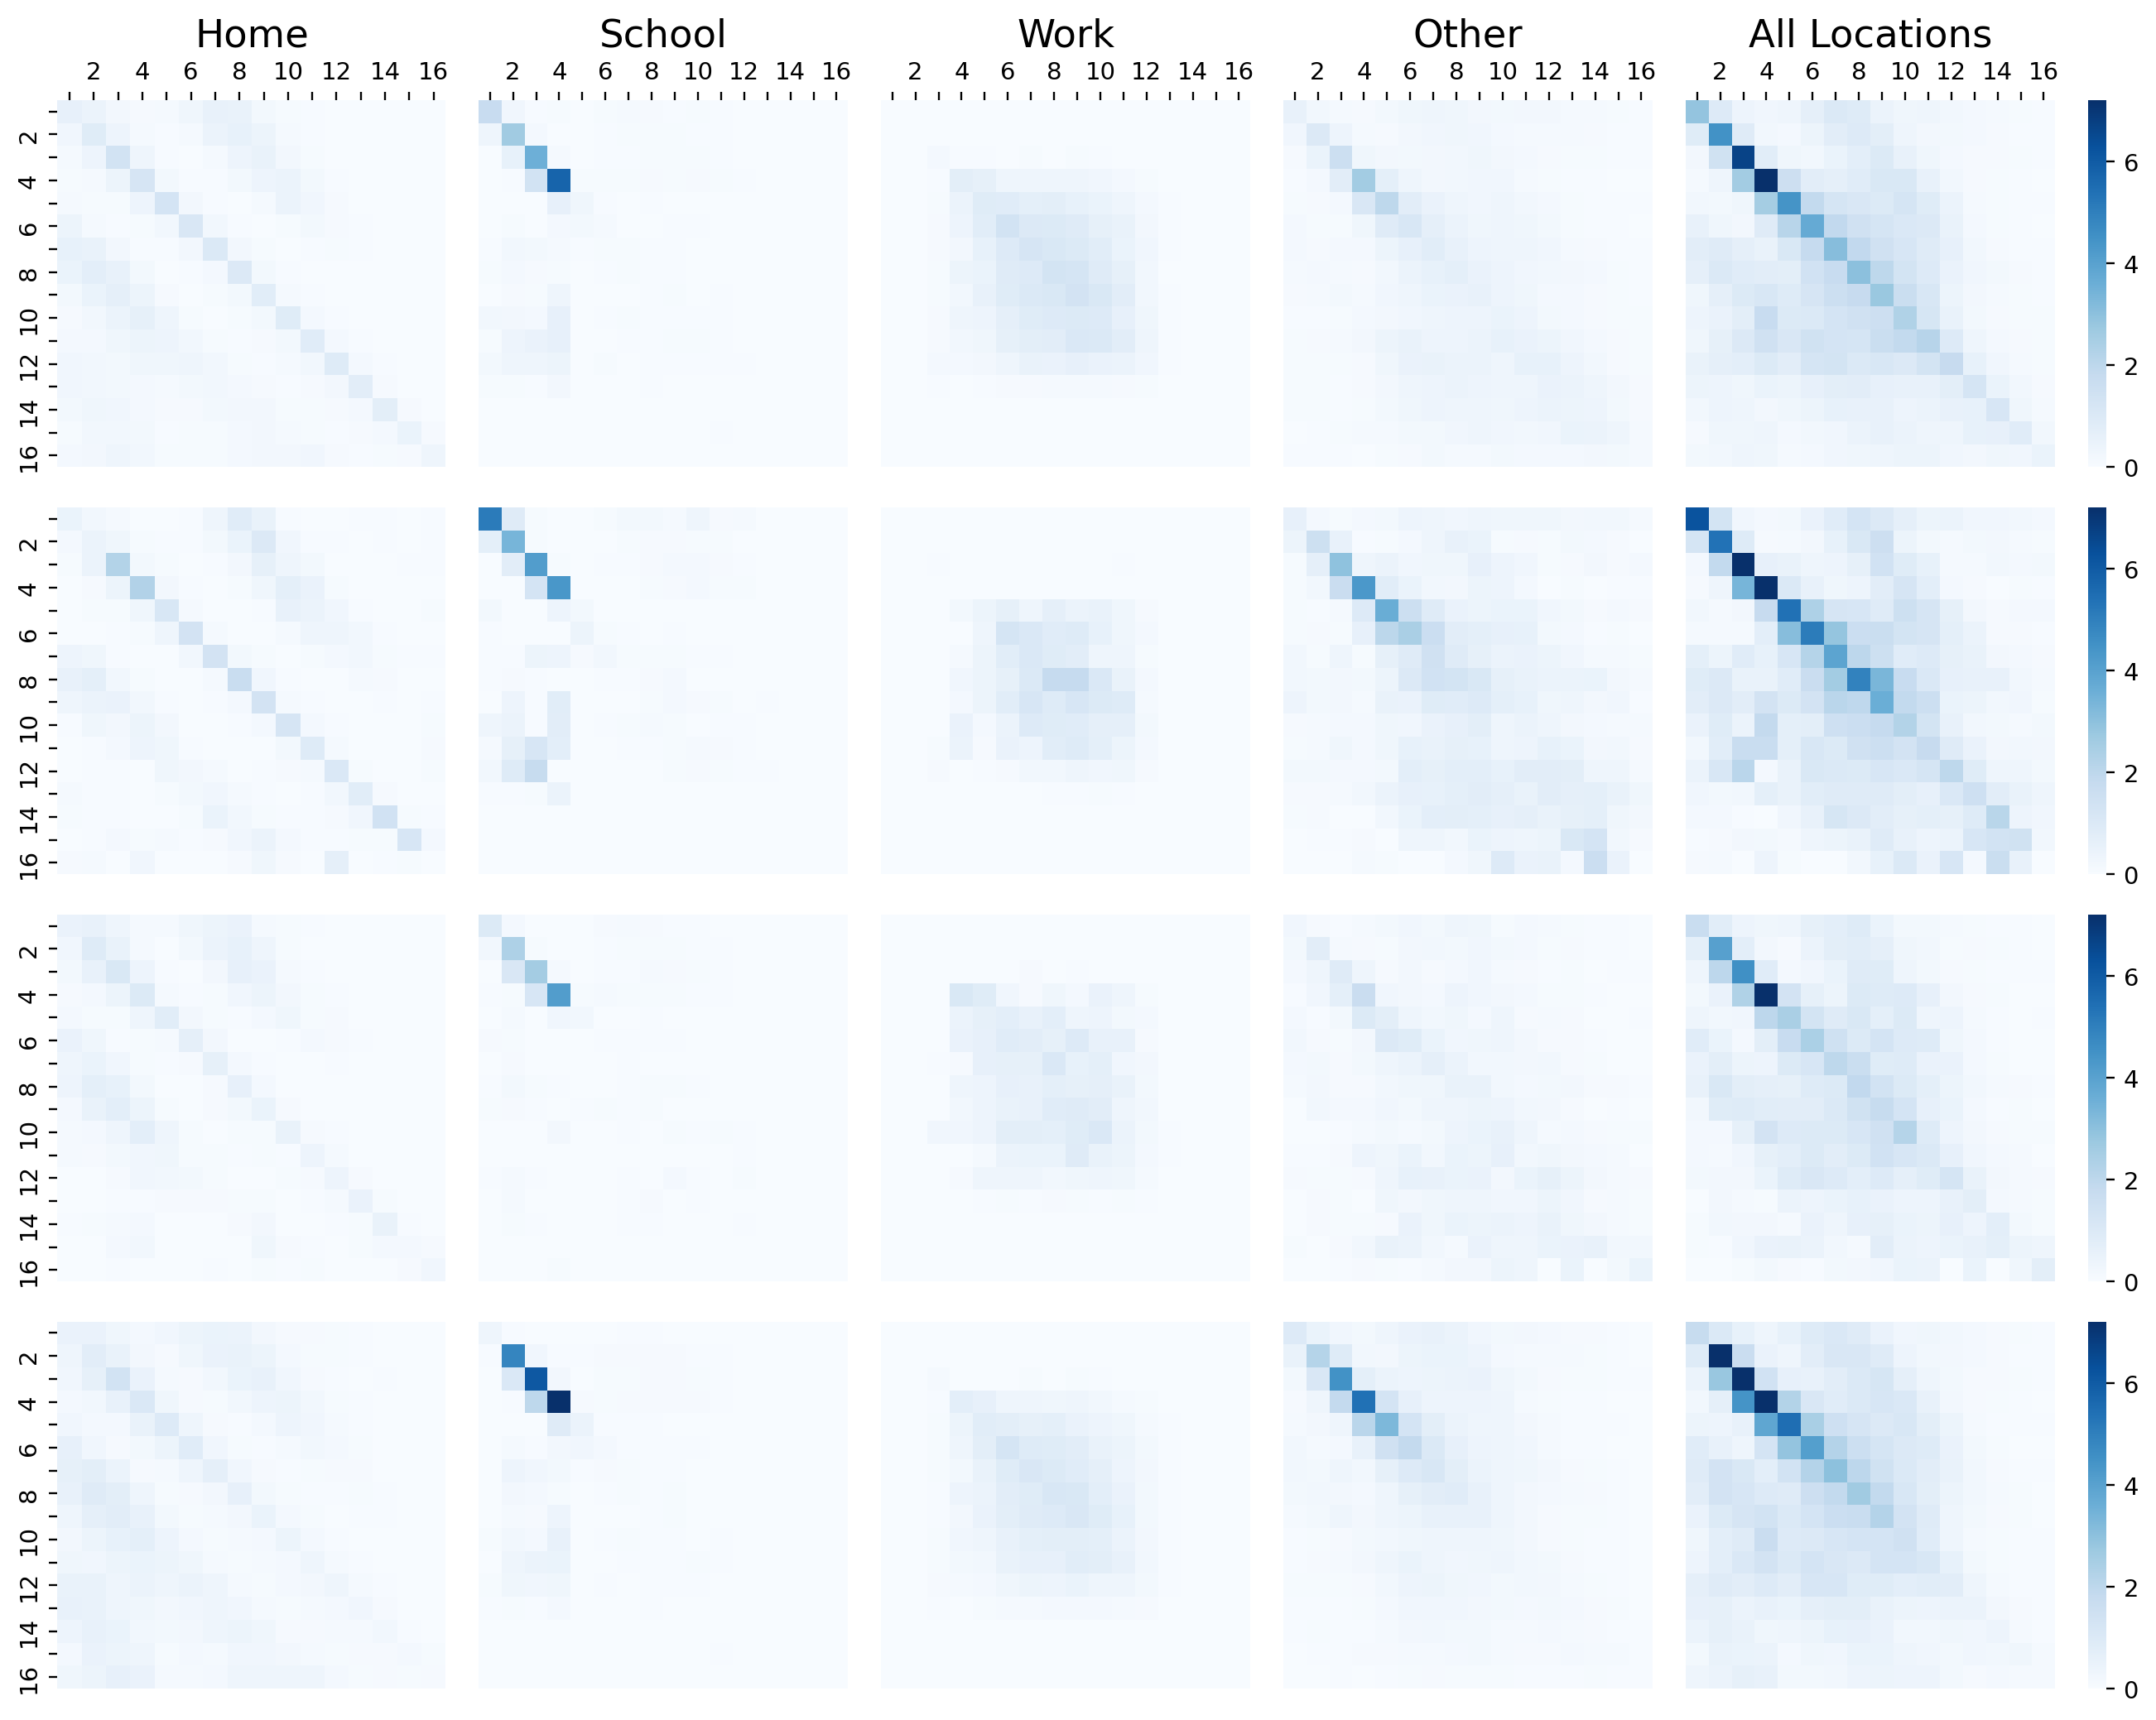

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

regions = ["British Columbia", 'Lombardy', 'London', 'Sao Paulo']
locations = ['contacts_home.csv', 'contacts_school.csv', 'contacts_work.csv', 'contacts_other_locations.csv']
ages_tick = range(1,17)
ages = [a if a%2==0 else '' for a in ages_tick]
#['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']

# Step 1: Find global vmin and vmax across all regions and locations
global_vmin = float('inf')
global_vmax = -float('inf')

# Loop through all regions and locations to find the global min/max values
for region in regions:
    for location in locations:
        contacts = pd.read_csv(f'../data/regions/{region}/contacts_matrix/{location}', header=None, index_col=False)
        global_vmin = min(global_vmin, contacts.min().min())
        global_vmax = max(global_vmax, contacts.max().max())

# Step 2: Create the plot with unified vmin and vmax
fig, ax = plt.subplots(nrows=4, ncols=6, dpi=210, figsize=(12.5, 10), gridspec_kw={'width_ratios': [1.05, 1, 1, 1, 1, 0.05]})

for i, region in enumerate(regions):
    contacts_matrices = []
    for location in locations:
        contacts = pd.read_csv(f'../data/regions/{region}/contacts_matrix/{location}', header=None, index_col=False)
        contacts_matrices.append(contacts)
    
    contact_all = np.zeros((16,16))
    for j, contacts in enumerate(contacts_matrices):
        #mask = np.triu(np.ones_like(contacts, dtype=bool), k=1)
        sns.heatmap(contacts, ax=ax[i][j], cmap="Blues", cbar=False, vmin=global_vmin, vmax=global_vmax) # mask=mask
        contact_all += contacts
    print('spectral radius:', np.max(np.abs(eigvals(contact_all))))
        
    if j == 0:
        ax[i][j].set_ylabel(region, rotation=90, fontsize=14, labelpad=10)

    # Plot the combined contact matrix (sum of all locations)
    sns.heatmap(contact_all, ax=ax[i][4], cmap="Blues", cbar=False, vmin=global_vmin, vmax=global_vmax) 
    
    # Add color bar to the last column of each row with the unified vmin and vmax
    sns.heatmap(contact_all, ax=ax[i][4], cmap="Blues", cbar=True, cbar_ax=ax[i][5], vmin=global_vmin, vmax=global_vmax, cbar_kws={'shrink': 0.8})

# Set xticks for the last row
for i in range(1,4):
    for j in range(1,5):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

for j in range(0,5):
    ax[0][j].set_xticks(np.arange(16) + 0.5)  # Set x-axis tick positions for the last row
    ax[0][j].set_xticklabels(ages, rotation=0)
    ax[0][j].xaxis.set_ticks_position('top')
    ax[0][j].xaxis.set_label_position('top')
    ax[0][j].set_yticks([])

for i in range(0,4):
    ax[i][0].set_yticks(np.arange(16) + 0.5)  # Set y-axis tick positions for the last row
    ax[i][0].set_yticklabels(ages)
    if i!=0:
        ax[i][0].set_xticks([])


# Set titles for the columns
ax[0][0].set_title('Home', fontsize=16)
ax[0][1].set_title('School', fontsize=16)
ax[0][2].set_title('Work', fontsize=16)
ax[0][3].set_title('Other', fontsize=16)
ax[0][4].set_title('All Locations', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig(r'.\figures\contact_four_places.pdf', bbox_inches="tight")
# Show the plot
plt.show()

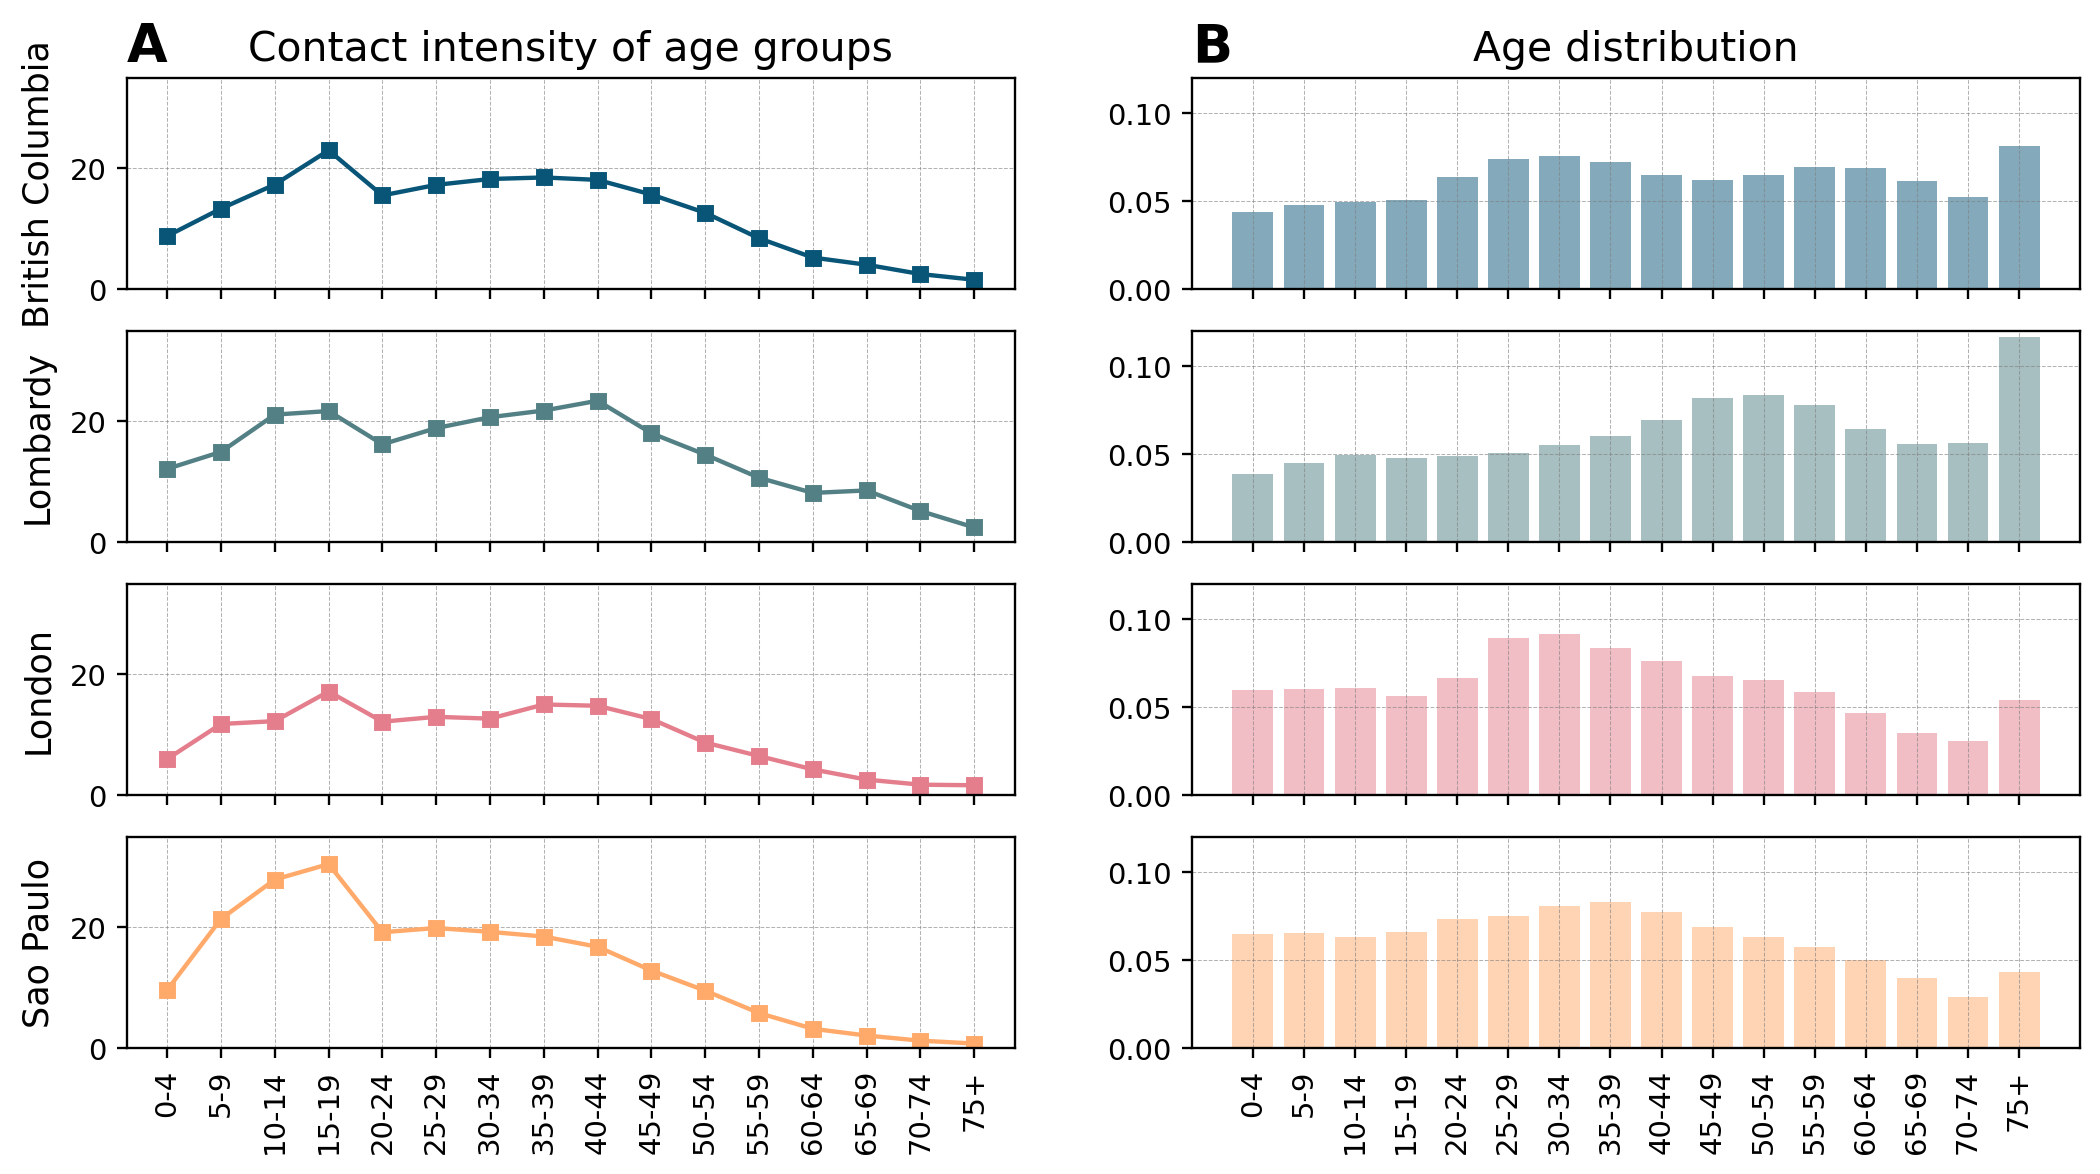

In [4]:
## demographics
regions=["British Columbia", 'Lombardy', 'London', 'Sao Paulo']
locations=['contacts_home.csv', 'contacts_school.csv', 'contacts_work.csv', 'contacts_other_locations.csv']
ages=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
colors = ['#085578', '#538085', '#e47e8c', '#ffaa6a']
i=0
fig, ax=plt.subplots(nrows=4, ncols=2, dpi=210, figsize=(12,6))
for region in regions:
    C=np.zeros((16,16))
    for location in locations:
        contacts=pd.read_csv('../data/regions/'+region+'/contacts_matrix/'+location, header=None, index_col=False)
        C=C+contacts
    contacts_age_group=np.sum(C, axis=0)
    ax[i][0].plot(contacts_age_group, color=colors[i], marker='s', markersize=5, alpha=1)
    pop_dist= pd.read_excel('../data/regions/'+region+'/demographic/pop_5years.xlsx')
    ax[i][1].bar(pop_dist['Age'], pop_dist['total']/sum(pop_dist['total'].values), color=colors[i], alpha=0.5)
    ax[i][0].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    ax[i][1].grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    ax[i][1].set_ylim(0, 0.12)
    ax[i][0].set_ylabel(region, rotation=90, fontsize=12, labelpad=5)
    ax[i][0].set_ylim([0,35])
    if i==3:
        ax[i][0].set_xticks(np.arange(len(ages)))  # 设置x轴刻度位置
        ax[i][0].set_xticklabels(ages, rotation=90, ha='center')
        ax[i][1].set_xticks(np.arange(len(ages)))  # 设置x轴刻度位置
        ax[i][1].set_xticklabels(ages, rotation=90, ha='center')
        #ax[i][j].set_yticks([])
    else:
        ax[i][0].set_xticks(np.arange(len(ages)))  # 设置x轴刻度位置
        ax[i][0].set_xticklabels("")
        ax[i][1].set_xticks(np.arange(len(ages)))  # 设置x轴刻度位置
        ax[i][1].set_xticklabels("")
        #ax[i][j].set_yticks([])
    i+=1
ax[0][0].set_title('Contact intensity of age groups', fontsize=14)
ax[0][1].set_title('Age distribution', fontsize=14)
ax[0][0].annotate("A", xy=(0., 1.15), xycoords='axes fraction', fontsize=18, va='center', ha='left', weight="bold")
ax[0][1].annotate("B", xy=(0., 1.15), xycoords='axes fraction', fontsize=18, va='center', ha='left', weight="bold")
plt.savefig(r'.\figures\contact_demo.pdf', bbox_inches="tight")